
# Palm Leaf Disease Dataset - Image Distribution and Visualization

This document provides a brief analysis of the dataset used for palm leaf disease detection. It includes a category-wise image count and visual samples from each class.

##  Dataset Structure

The dataset is organized as follows:

Each subfolder represents a distinct disease class.

---

##  Image Count per Category

The script iterates through each category directory and counts the number of images inside. This information is then visualized using a bar chart.

-  Helps identify data imbalance.
-  Useful for understanding the dataset distribution.

**Output:**
- X-axis: Class names
- Y-axis: Number of images in each class

---

##  Displaying Sample Images per Class

For a quick visual check, the script displays 4 sample images from each category.

-  Each row shows a category.
-  Each row contains up to 4 sample images.
-  Helps inspect image quality, variation, and class-specific features.

---

##  Summary

| Task                        | Description                          |
|-----------------------------|--------------------------------------|
| Count images per category   | Bar chart visualization              |
| Show sample images          | 4 images per class in a grid         |
| Purpose                     | Dataset exploration and verification |

This analysis is essential to ensure data is well-distributed and suitable for training deep learning models.


2025-04-09 16:11:31.939637: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-04-09 16:11:31.939799: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-04-09 16:11:32.089881: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered


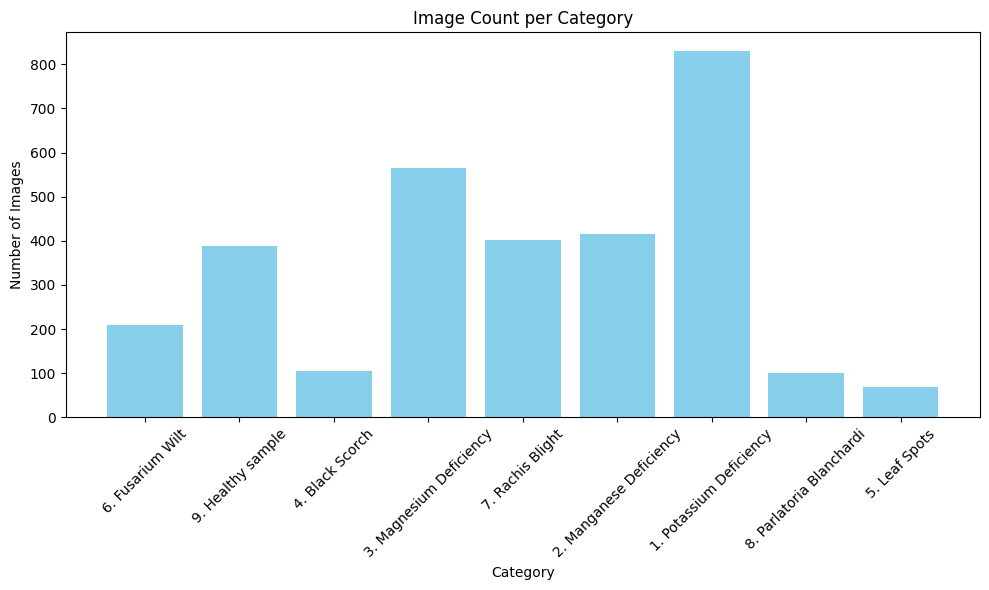

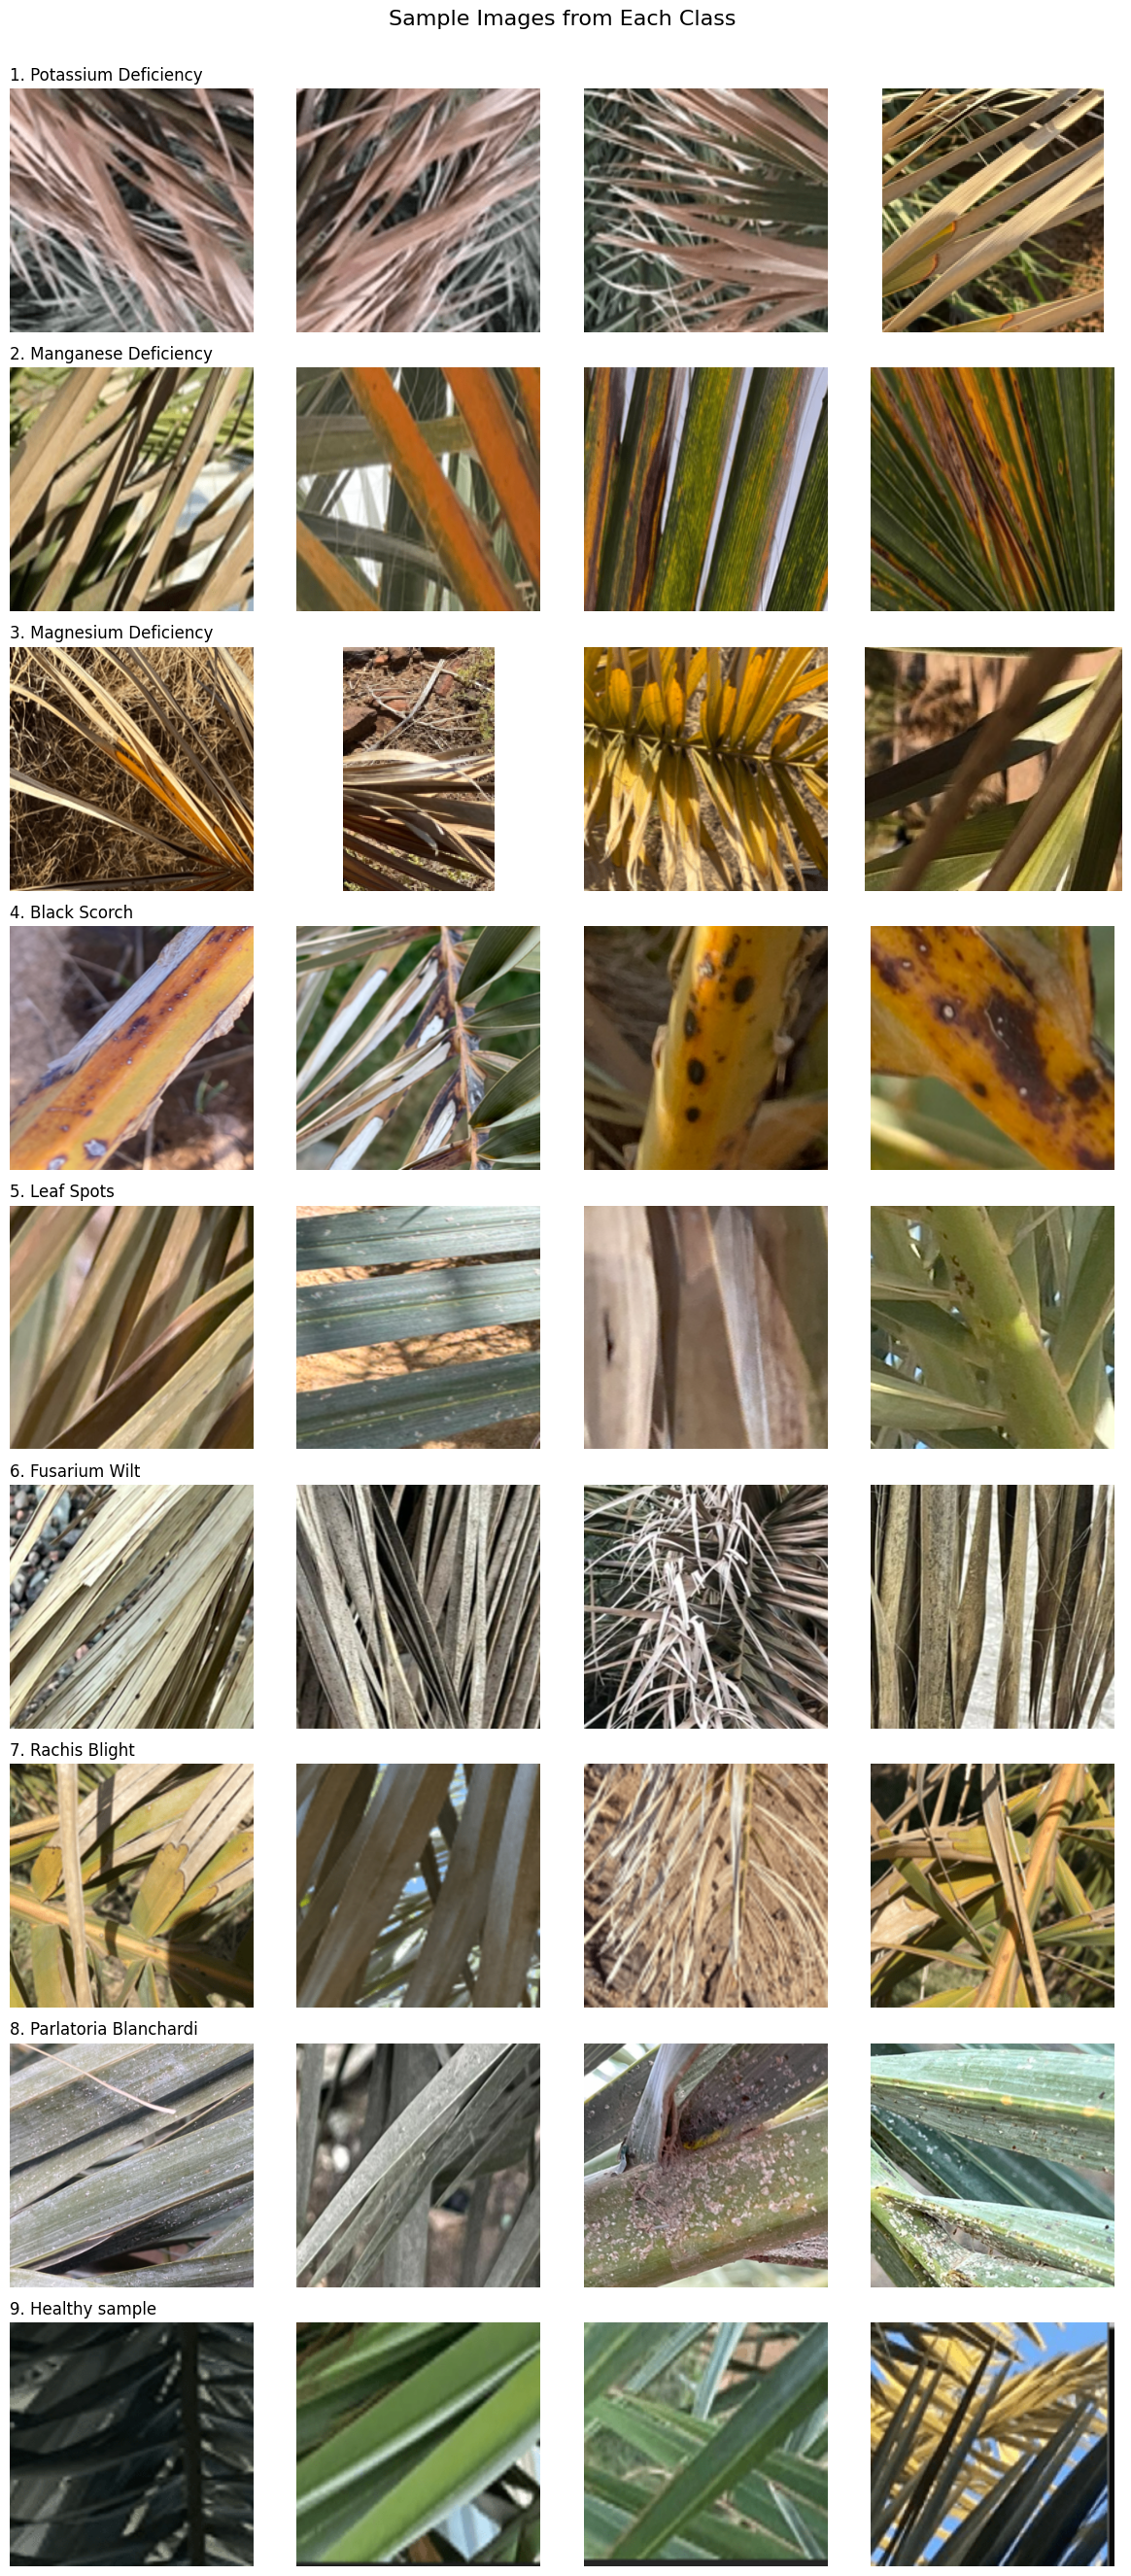

In [1]:
import os
import matplotlib.pyplot as plt
import tensorflow as tf
from collections import Counter
import numpy as np

# --- Set dataset path ---
base_dir = '/kaggle/input/palm-dises-detection/Diseases of date palm leaves dataset/Infected Date Palm Leaves Dataset/Processed'

# --- Count total images per category ---
category_counts = {}
for category in os.listdir(base_dir):
    category_path = os.path.join(base_dir, category)
    if os.path.isdir(category_path):
        image_count = len([
            file for file in os.listdir(category_path)
            if file.lower().endswith(('.png', '.jpg', '.jpeg'))
        ])
        category_counts[category] = image_count

# --- Plot bar chart of image counts per category ---
plt.figure(figsize=(10, 6))
plt.bar(category_counts.keys(), category_counts.values(), color='skyblue')
plt.title('Image Count per Category')
plt.xlabel('Category')
plt.ylabel('Number of Images')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# --- Plot 4 images per category ---
import PIL.Image

def plot_sample_images_per_class(base_dir, class_names, images_per_class=4):
    plt.figure(figsize=(images_per_class * 3, len(class_names) * 3))
    for row_idx, class_name in enumerate(class_names):
        class_path = os.path.join(base_dir, class_name)
        image_files = [f for f in os.listdir(class_path)
                       if f.lower().endswith(('.jpg', '.jpeg', '.png'))][:images_per_class]
        for col_idx, image_file in enumerate(image_files):
            img_path = os.path.join(class_path, image_file)
            img = PIL.Image.open(img_path)
            ax = plt.subplot(len(class_names), images_per_class, row_idx * images_per_class + col_idx + 1)
            plt.imshow(img)
            plt.axis("off")
            if col_idx == 0:
                ax.set_title(class_name, fontsize=12, loc='left')
    plt.suptitle('Sample Images from Each Class', fontsize=16)
    plt.tight_layout()
    plt.subplots_adjust(top=0.95)
    plt.show()

# --- Get sorted class names from directory ---
class_names = sorted(os.listdir(base_dir))

# --- Display images ---
plot_sample_images_per_class(base_dir, class_names, images_per_class=4)


# Palm Leaf Disease Classification with EfficientNet and SE Attention

This project implements a deep learning pipeline using **TensorFlow** and **Keras** to classify diseases in palm leaves. The model architecture combines **EfficientNetB0** with a **Squeeze-and-Excitation (SE) attention block** to enhance channel-wise feature representations.

---

## Dataset Loading and Preparation

- **Dataset Path**:
  - Located in: `/kaggle/input/palm-dises-detection/.../Processed`
- **Image Preprocessing**:
  - All images are resized to `224x224`.
  - Batches of 32 are used.
  - Labels are one-hot encoded via `label_mode='categorical'`.

- **Manual Data Split**:
  - Dataset is split manually into 80% training and 20% testing using `.take()` and `.skip()`.

- **Performance Optimization**:
  - `.cache()` and `.prefetch()` are used to accelerate training by preloading data into memory.

---

##  Model Architecture

### 1. **Input Augmentations**
- Rescaling pixel values from `[0, 255]` to `[0, 1]`.
- Data augmentation:
  - Horizontal flipping
  - Random rotation
  - Random zooming

### 2. **Base Model: EfficientNetB0**
- Pre-trained on ImageNet, included without top layers.
- Trainable for fine-tuning.

### 3. **Squeeze-and-Excitation (SE) Block**
A lightweight attention mechanism that:
- Uses global average pooling to generate channel-wise statistics.
- Passes through two dense layers:
  - ReLU activation → reduces dimensionality
  - Sigmoid activation → outputs attention weights
- Multiplies original feature maps with attention weights.

### 4. **Classification Head**
- Global Average Pooling
- Dropout (0.2)
- Dense layer with `softmax` activation for 9-class classification

---

##  Model Compilation & Training

- **Optimizer**: Adam with learning rate `1e-4`
- **Loss**: Categorical Crossentropy
- **Metric**: Accuracy

###  Callbacks:
- `ModelCheckpoint`: Saves best model based on highest training accuracy.
- `ReduceLROnPlateau`: Reduces learning rate on plateau of loss.

---

##  Evaluation

### 1. **Accuracy**
- Computed using `model.evaluate()` on test data.

### 2. **Classification Report**
- Using `sklearn.metrics.classification_report`:
  - Displays precision, recall, F1-score, and support for each class.

### 3. **Confusion Matrix**
- Constructed using `confusion_matrix()` from sklearn.
- Visualized as a heatmap with `seaborn`.

### 4. **ROC Curve and AUC**
- Converts true labels to one-hot (`label_binarize()`).
- Uses `roc_curve` and `auc` from sklearn.
- AUC and ROC are computed and plotted **per class**.

---

##  Visualizations

- **Confusion Matrix**:
  - Heatmap showing predicted vs true labels.

- **ROC Curve**:
  - For each class, the True Positive Rate vs. False Positive Rate is plotted.
  - AUC values indicate the quality of classification.

---

##  Model Saving

- Final model is saved as `final_palm_leaf_model.keras`.

---

##  Dependencies

- TensorFlow
- NumPy
- Matplotlib
- Seaborn
- Scikit-learn

Install via:

```bash
pip install tensorflow scikit-learn matplotlib seaborn


Found 3089 files belonging to 9 classes.
Detected classes: ['1. Potassium Deficiency', '2. Manganese Deficiency', '3. Magnesium Deficiency', '4. Black Scorch', '5. Leaf Spots', '6. Fusarium Wilt', '7. Rachis Blight', '8. Parlatoria Blanchardi', '9. Healthy sample']


Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_8         │ (None, 224, 224,  │          0 │ input_layer_4[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ random_flip_4       │ (None, 224, 224,  │          0 │ rescaling_8[0][0] │
│ (RandomFlip)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ random_rotation_4   │ (None, 224, 224,  │          0 │ random_flip_4[0]… │
│ (RandomRotation)    │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ random_zoom_3       │ (None, 224, 224,  │          0 │ random_rotation_… │
│ (RandomZoom)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_9         │ (None, 224, 224,  │          0 │ random_zoom_3[0]… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ normalization_2     │ (None, 224, 224,  │          7 │ rescaling_9[0][0] │
│ (Normalization)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ rescaling_10        │ (None, 224, 224,  │          0 │ normalization_2[… │
│ (Rescaling)         │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv_pad       │ (None, 225, 225,  │          0 │ rescaling_10[0][… │
│ (ZeroPadding2D)     │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_conv (Conv2D)  │ (None, 112, 112,  │        864 │ stem_conv_pad[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_bn             │ (None, 112, 112,  │        128 │ stem_conv[0][0]   │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ stem_activation     │ (None, 112, 112,  │          0 │ stem_bn[0][0]     │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_dwconv      │ (None, 112, 112,  │        288 │ stem_activation[… │
│ (DepthwiseConv2D)   │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_bn          │ (None, 112, 112,  │        128 │ block1a_dwconv[0… │
│ (BatchNormalizatio… │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_activation  │ (None, 112, 112,  │          0 │ block1a_bn[0][0]  │
│ (Activation)        │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_squeeze  │ (None, 32)        │          0 │ block1a_activati… │
│ (GlobalAveragePool… │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ block1a_se_reshape  │ (None, 1, 1, 32)  │          0 │ block1a_se_squee

 Total params: 4,265,900 (16.27 MB)

 Trainable params: 4,223,877 (16.11 MB)

 Non-trainable params: 42,023 (164.16 KB)

Epoch 1/50


2025-04-09 14:43:52.253394: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape inStatefulPartitionedCall/functional_2_1/block2b_drop_1/stateless_dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 255ms/step - accuracy: 0.2944 - loss: 2.0140
Epoch 1: accuracy improved from -inf to 0.41477, saving model to best_model.keras
77/77 ━━━━━━━━━━━━━━━━━━━━ 53s 266ms/step - accuracy: 0.2959 - loss: 2.0117 - learning_rate: 1.0000e-04
Epoch 2/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 249ms/step - accuracy: 0.6169 - loss: 1.2927
Epoch 2: accuracy improved from 0.41477 to 0.66193, saving model to best_model.keras
77/77 ━━━━━━━━━━━━━━━━━━━━ 20s 260ms/step - accuracy: 0.6175 - loss: 1.2909 - learning_rate: 1.0000e-04
Epoch 3/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 251ms/step - accuracy: 0.7631 - loss: 0.8098
Epoch 3: accuracy improved from 0.66193 to 0.79911, saving model to best_model.keras
77/77 ━━━━━━━━━━━━━━━━━━━━ 20s 262ms/step - accuracy: 0.7635 - loss: 0.8086 - learning_rate: 1.0000e-04
Epoch 4/50
77/77 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step - accuracy: 0.8482 - loss: 0.5113
Epoch 4: accuracy improved from 0.79911 to 0.87054, saving model to best_model.keras
77/77 ━━━━━━━━━━━━

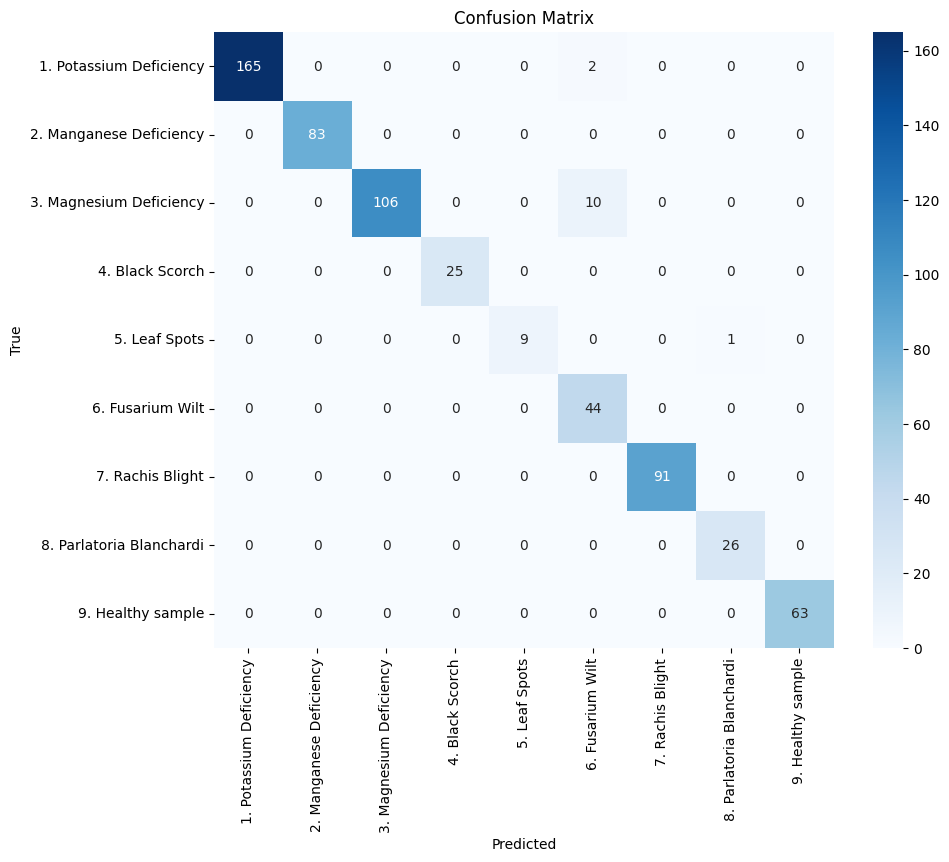

20/20 ━━━━━━━━━━━━━━━━━━━━ 4s 137ms/step


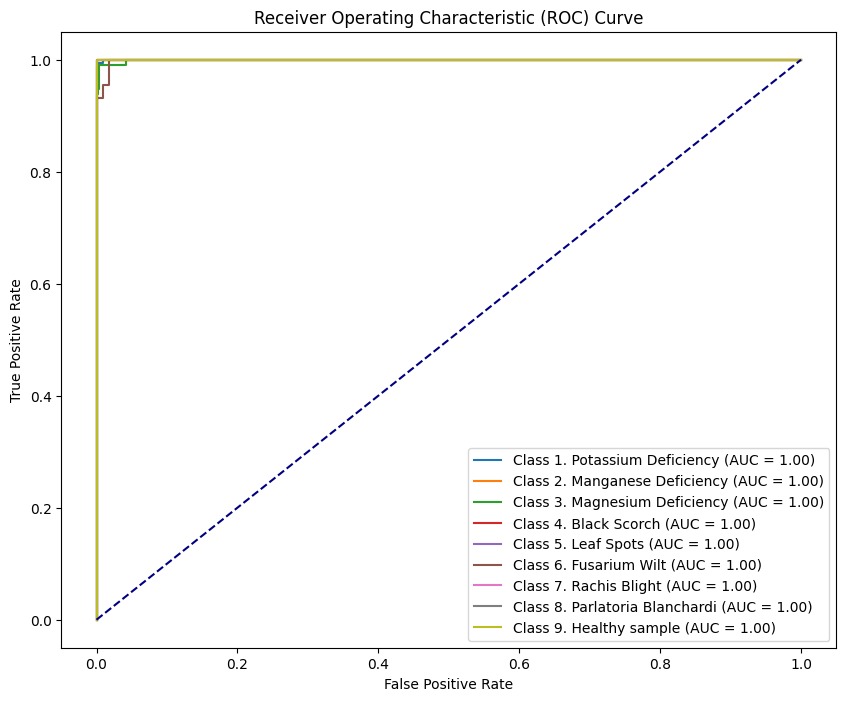

In [8]:
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks, optimizers, applications
import os
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import label_binarize

# --- Squeeze-and-Excitation (SE) Attention Block ---
def se_block(input_tensor, reduction=16):
    channels = input_tensor.shape[-1]
    se = layers.GlobalAveragePooling2D()(input_tensor)
    se = layers.Reshape((1, 1, channels))(se)
    se = layers.Dense(channels // reduction, activation='relu', kernel_initializer='he_normal', use_bias=False)(se)
    se = layers.Dense(channels, activation='sigmoid', kernel_initializer='he_normal', use_bias=False)(se)
    return layers.multiply([input_tensor, se])

# --- Model Architecture with EfficientNetB0 + SE Attention ---
def build_model(input_shape=(224, 224, 3), num_classes=9):
    inputs = tf.keras.Input(shape=input_shape)
    x = layers.Rescaling(1./255)(inputs)
    x = layers.RandomFlip("horizontal")(x)
    x = layers.RandomRotation(0.2)(x)
    x = layers.RandomZoom(0.2)(x)

    base_model = applications.EfficientNetB0(include_top=False, weights='imagenet', input_tensor=x)
    base_model.trainable = True
    x = base_model.output
    x = se_block(x)
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dropout(0.2)(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)

    model = models.Model(inputs, outputs)
    model.compile(optimizer=optimizers.Adam(1e-4),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

# --- Load Full Dataset ---
base_dir = '/kaggle/input/palm-dises-detection/Diseases of date palm leaves dataset/Infected Date Palm Leaves Dataset/Processed'
batch_size = 32
img_height = 224
img_width = 224

# Load all data
full_dataset = tf.keras.preprocessing.image_dataset_from_directory(
    base_dir,
    image_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle=True,
    label_mode='categorical',
    seed=123
)

# --- Manual Split: 80% Train, 20% Test ---
total_batches = len(full_dataset)
train_batches = int(0.8 * total_batches)

train_ds = full_dataset.take(train_batches)
test_ds = full_dataset.skip(train_batches)

# --- Prefetch for speed ---
AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

# --- Class Info ---
class_names = full_dataset.class_names
num_classes = len(class_names)
print("Detected classes:", class_names)

# --- Build and Train the Model ---
model = build_model(input_shape=(img_height, img_width, 3), num_classes=num_classes)
model.summary()

# --- Callbacks (No EarlyStopping) ---
checkpoint = callbacks.ModelCheckpoint('best_model.keras', monitor='accuracy', save_best_only=True, verbose=1)
reduce_lr = callbacks.ReduceLROnPlateau(monitor='loss', factor=0.5, patience=5, min_lr=1e-6, verbose=1)

# --- Train Model ---
history = model.fit(
    train_ds,
    epochs=50,
    callbacks=[checkpoint, reduce_lr]
)

# --- Evaluate on Test Set ---
test_loss, test_acc = model.evaluate(test_ds)
print(f"Test Accuracy: {test_acc * 100:.2f}%")

# --- Save Final Model ---
model.save("final_palm_leaf_model.keras")

# --- Get True Labels and Predictions from Test Set ---
y_true = []
y_pred = []

# Loop through the test dataset and collect true labels and predictions
for images, labels in test_ds:
    y_true.extend(np.argmax(labels, axis=1))  # Get the true labels as class indices
    y_pred.extend(np.argmax(model.predict(images), axis=1))  # Get the predicted labels as class indices

# --- Classification Report ---
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))

# --- Confusion Matrix ---
cm = confusion_matrix(y_true, y_pred)

# --- Plot Confusion Matrix ---
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# --- ROC and AUC ---
# Convert to one-hot encoding
y_true_bin = label_binarize(y_true, classes=np.arange(num_classes))

# Get model's probability predictions
y_pred_prob = model.predict(test_ds)

# Plot ROC and AUC for each class
plt.figure(figsize=(10, 8))

for i in range(num_classes):
    fpr, tpr, _ = roc_curve(y_true_bin[:, i], y_pred_prob[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'Class {class_names[i]} (AUC = {roc_auc:.2f})')

# Plot diagonal line (random classifier)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()
